In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [8]:
os.chdir("/kaggle/input/ipl-dataset-2008-2022")

In [9]:
os.getcwd()

'/kaggle/input/ipl-dataset-2008-2022'

In [11]:
df=pd.read_csv('IPL Dataset 2008-2022.csv')

In [12]:
df

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [13]:
df.describe()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
count,2.259540e+05,225954.000000,225954.000000,225954.000000,225954.000000,225954.000000,225954.00000,225954.000000,225954.000000
mean,8.320470e+05,1.483868,9.185679,3.619750,1.243523,0.066907,1.31043,0.000093,0.049351
std,3.379542e+05,0.503104,5.681797,1.810633,1.618166,0.341470,1.60605,0.009640,0.216600
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.012620e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,8.297370e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.00000,0.000000,0.000000
75%,1.178395e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.00000,0.000000,0.000000
max,1.312200e+06,6.000000,19.000000,10.000000,6.000000,7.000000,7.00000,1.000000,1.000000


In [14]:
df.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

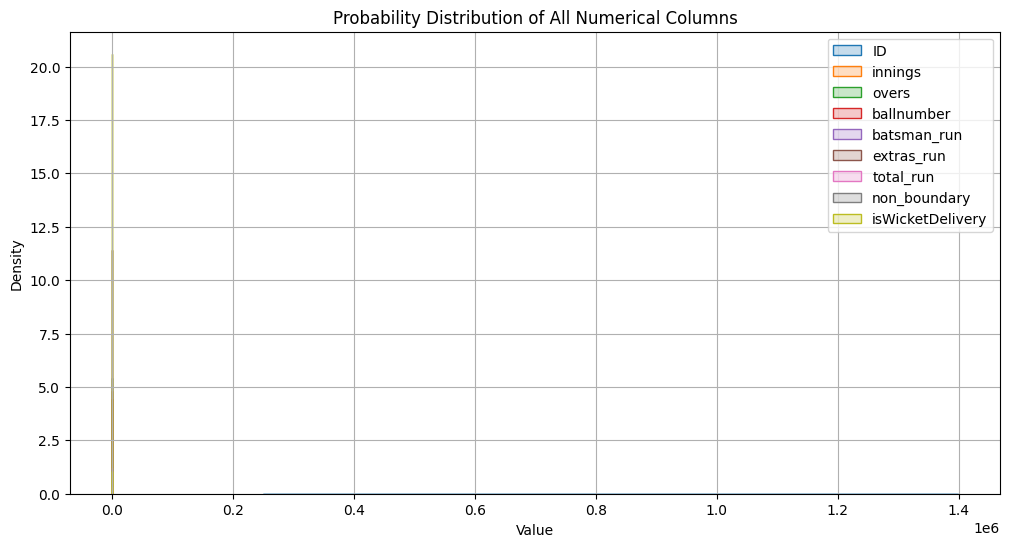

In [23]:
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(12, 6))
for col in numeric_cols:
    sns.kdeplot(df[col], fill=True, label=col)

plt.title("Probability Distribution of All Numerical Columns")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


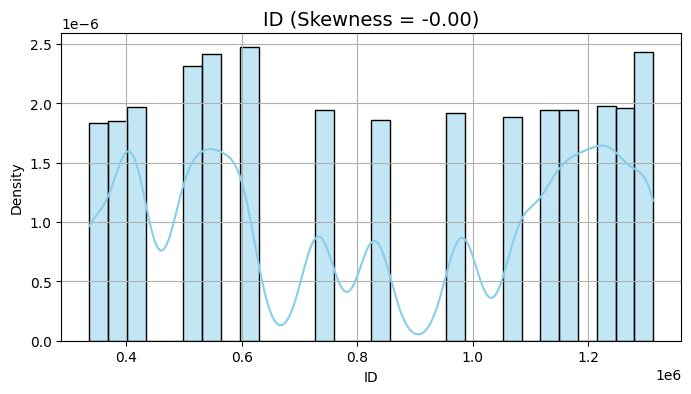

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


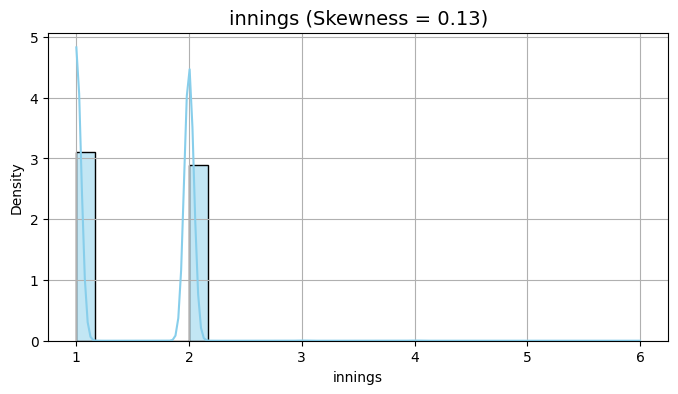

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


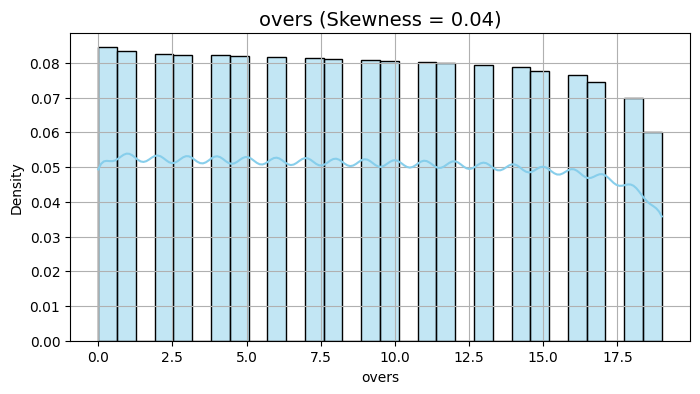

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


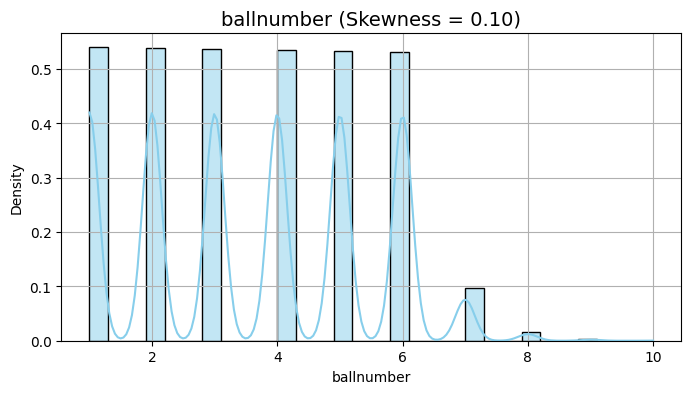

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


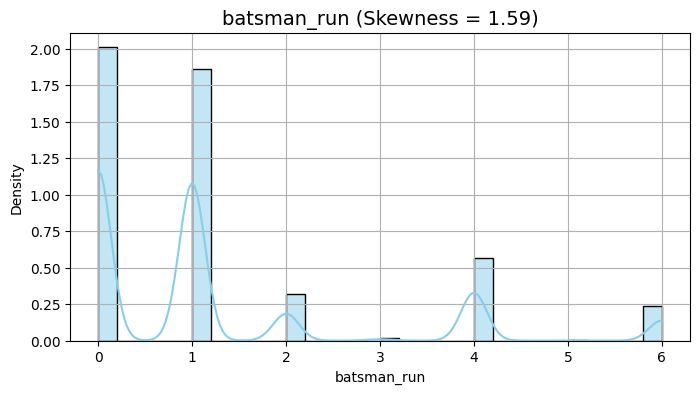

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


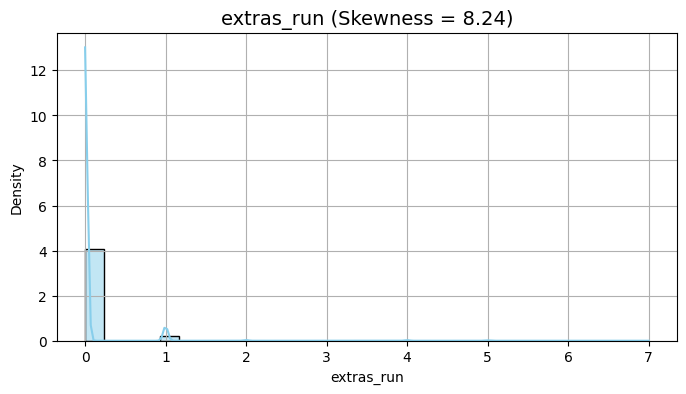

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


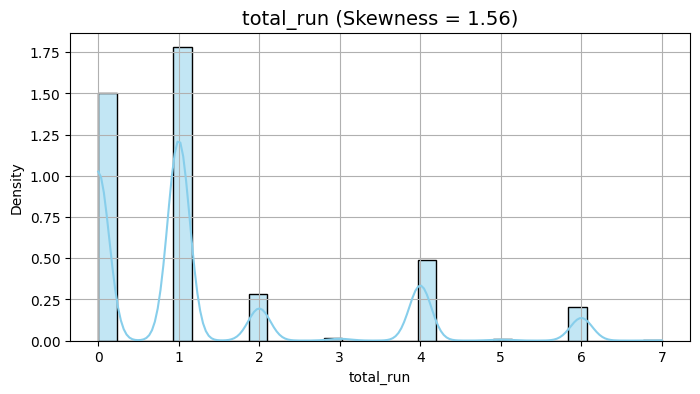

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


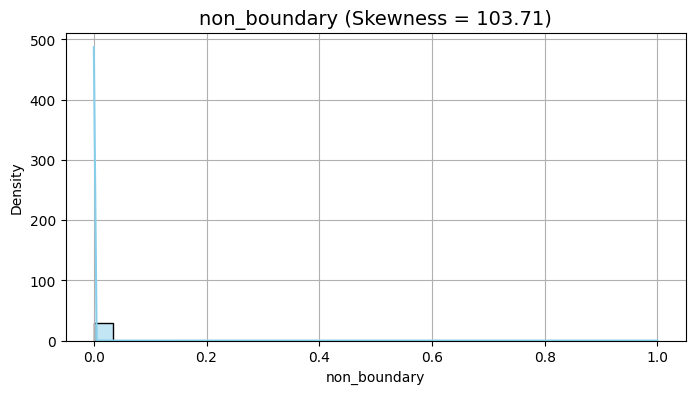

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


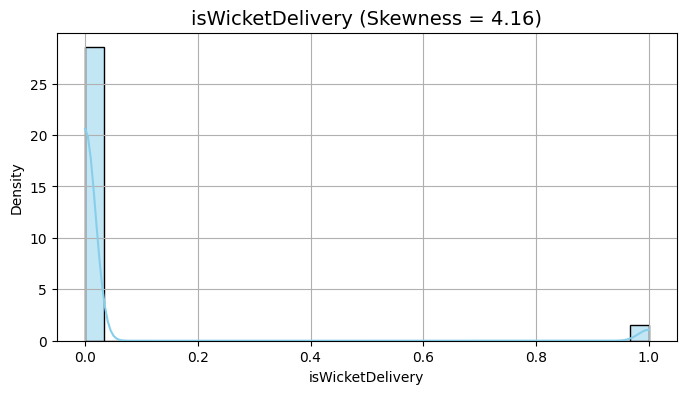

In [26]:
numeric_cols = df.select_dtypes(include='number').columns

# Plot histogram + KDE for each column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    
    # Plot histogram (bar plot)
    sns.histplot(df[col].dropna(), kde=True, color='skyblue', edgecolor='black', stat='density', bins=30)
    
    # Calculate skewness
    sk = skew(df[col].dropna())
    
    # Add title with skewness value
    plt.title(f"{col} (Skewness = {sk:.2f})", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

In [28]:
# # Drop nulls OR fill them smartly
# df['extra_type'].fillna('None', inplace=True)
# df['player_out'].fillna('None', inplace=True)
# df['kind'].fillna('None', inplace=True)
# df['fielders_involved'].fillna('None', inplace=True)

df['extra_type'] = df['extra_type'].fillna('None')
df['player_out'] = df['player_out'].fillna('None')
df['kind'] = df['kind'].fillna('None')
df['fielders_involved'] = df['fielders_involved'].fillna('None')


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


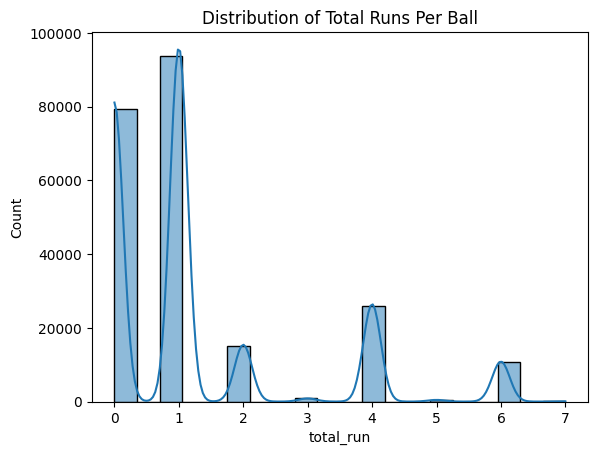

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


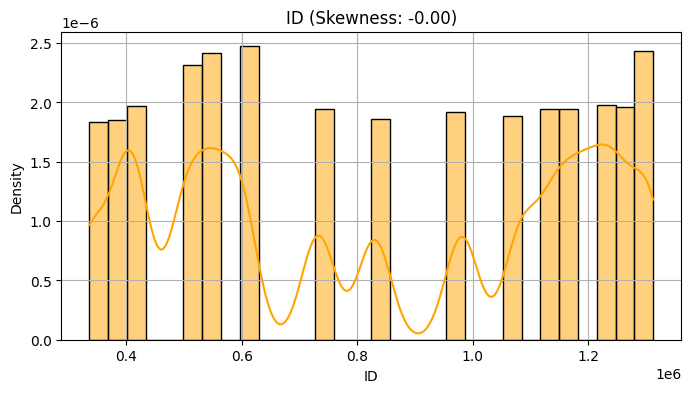

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


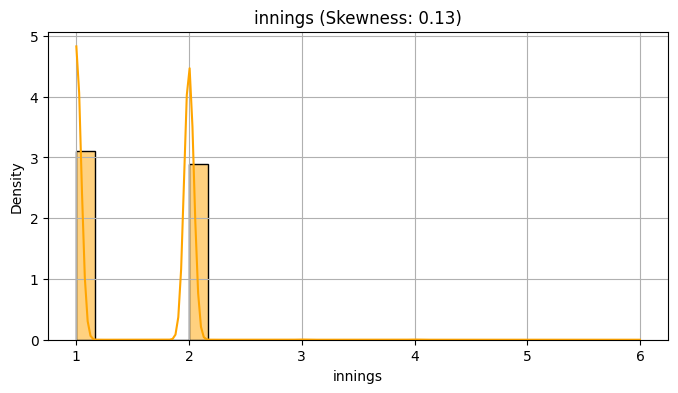

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


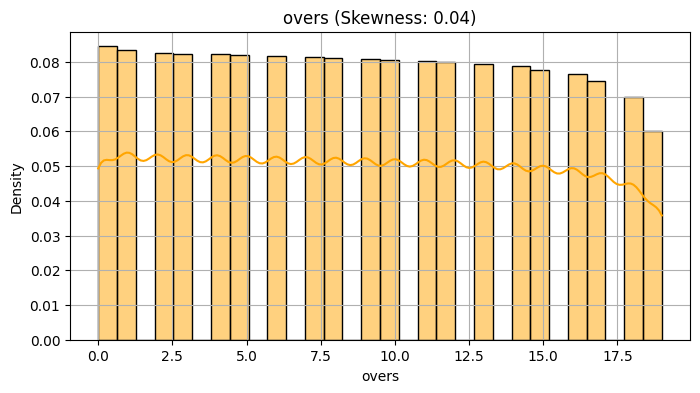

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


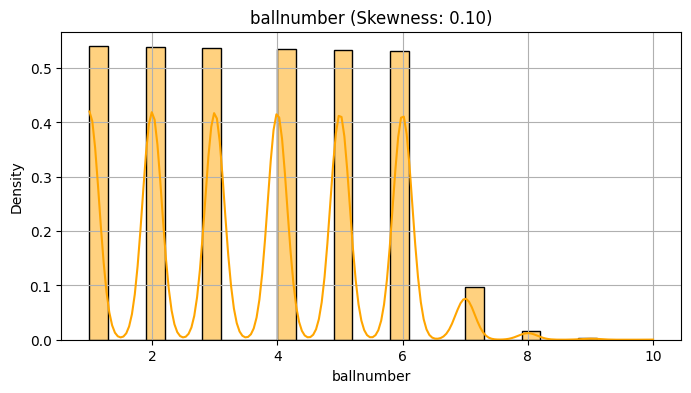

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


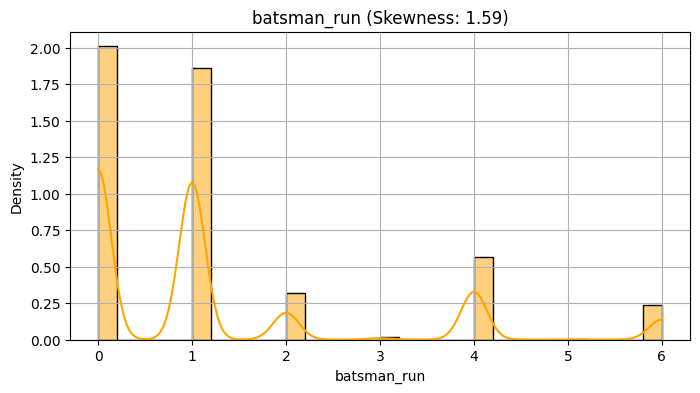

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


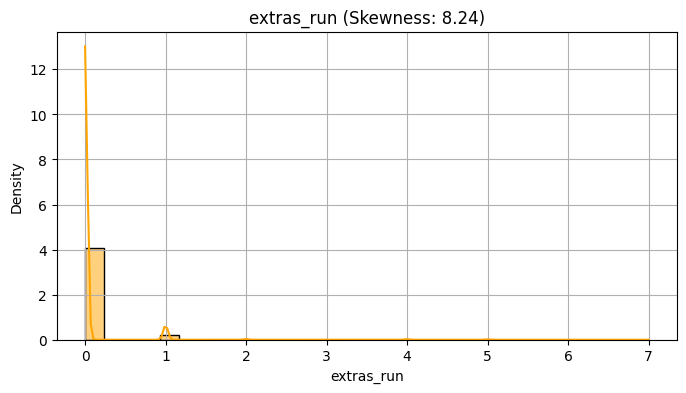

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


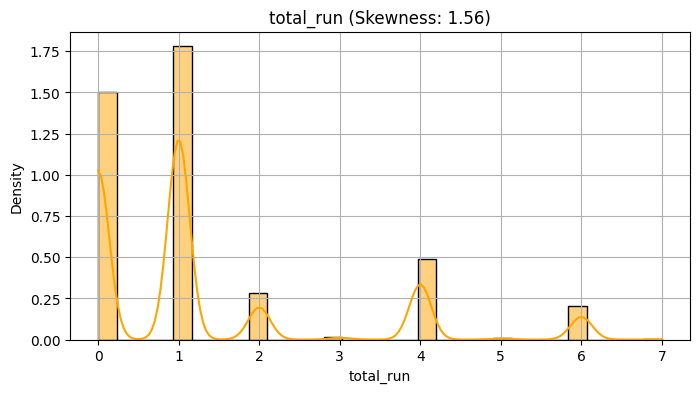

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


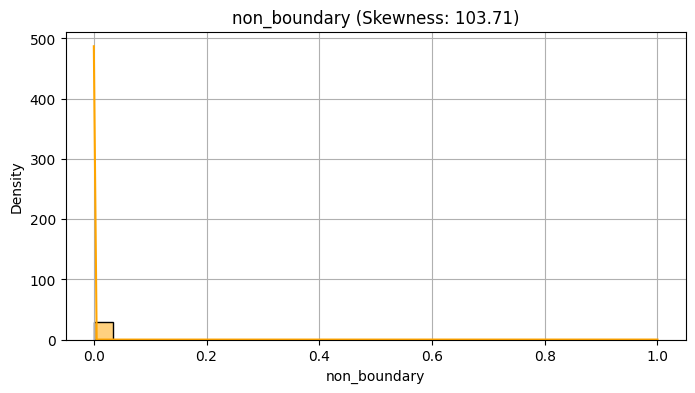

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


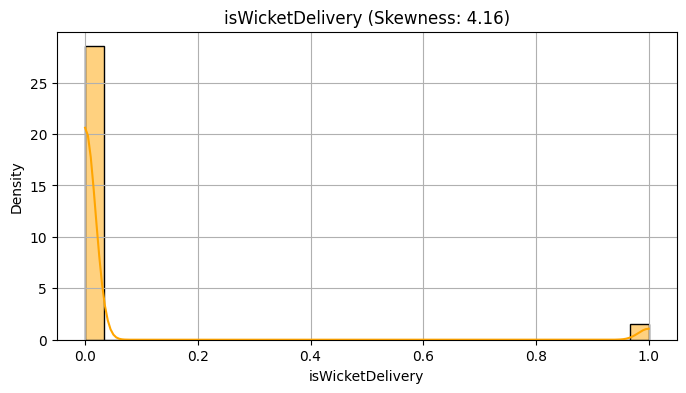

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of runs
sns.histplot(df['total_run'], kde=True, bins=20)
plt.title("Distribution of Total Runs Per Ball")
plt.show()

# Skewness bar+KDE combo
from scipy.stats import skew

numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, stat='density', bins=30, color='orange')
    sk = skew(df[col].dropna())
    plt.title(f'{col} (Skewness: {sk:.2f})')
    plt.grid(True)
    plt.show()


<Axes: title={'center': 'Top 10 Batsmen (Total Runs)'}, xlabel='batter'>

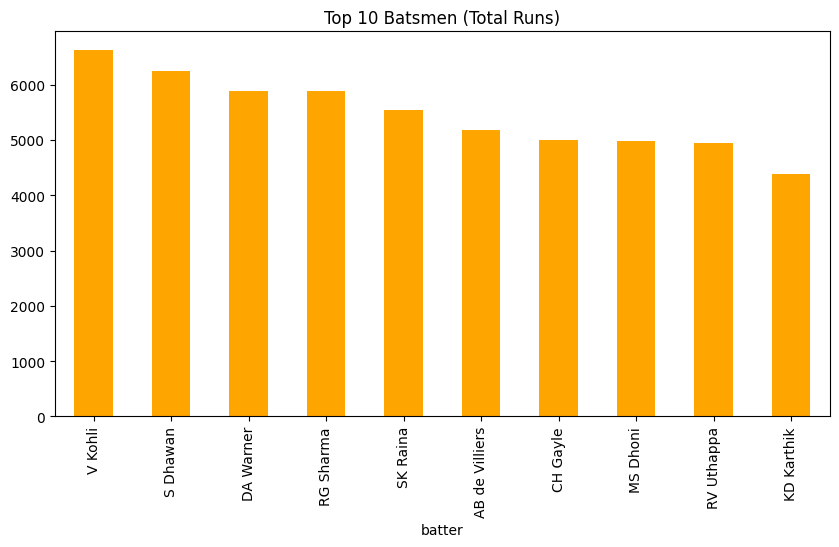

In [32]:
top_batsmen = df.groupby('batter')['batsman_run'].sum().sort_values(ascending=False).head(10)
top_batsmen.plot(kind='bar', figsize=(10,5), title='Top 10 Batsmen (Total Runs)', color='orange')


<Axes: title={'center': 'Top 10 Bowlers (Wickets Taken)'}, xlabel='bowler'>

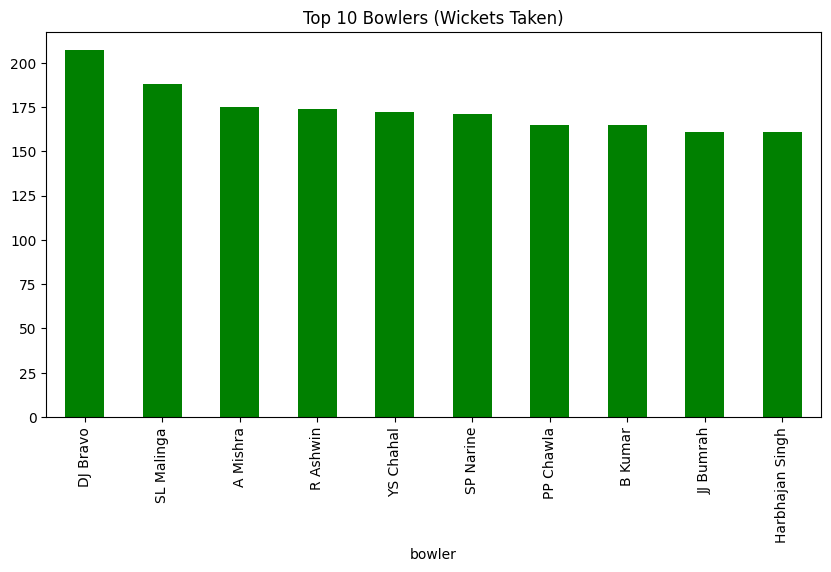

In [33]:
top_bowlers = df[df['isWicketDelivery'] == 1].groupby('bowler').size().sort_values(ascending=False).head(10)
top_bowlers.plot(kind='bar', figsize=(10,5), title='Top 10 Bowlers (Wickets Taken)', color='green')


<Axes: title={'center': 'Average Runs Per Over'}, xlabel='overs'>

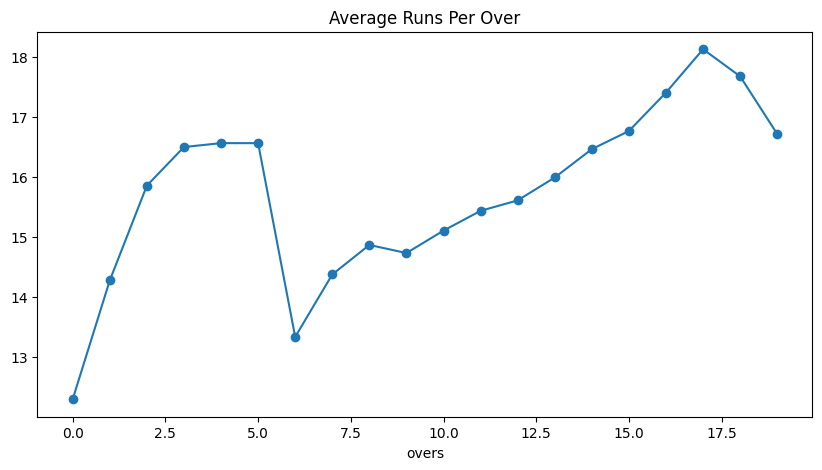

In [34]:
over_scores = df.groupby(['ID', 'overs'])['total_run'].sum().groupby('overs').mean()
over_scores.plot(kind='line', marker='o', figsize=(10,5), title='Average Runs Per Over')


In [35]:
partnerships = df.groupby(['ID', 'batter', 'non-striker'])['total_run'].sum().sort_values(ascending=False).head(10)
print(partnerships)


ID       batter          non-striker
1304112  Q de Kock       KL Rahul       141
829795   AB de Villiers  V Kohli        138
980987   AB de Villiers  V Kohli        132
598027   CH Gayle        TM Dilshan     130
548372   CH Gayle        V Kohli        128
501260   AC Gilchrist    SE Marsh       126
548329   DA Warner       NV Ojha        119
335994   AC Gilchrist    VVS Laxman     116
1175366  JM Bairstow     DA Warner      115
1216527  MA Agarwal      KL Rahul       113
Name: total_run, dtype: int64


In [36]:
def get_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'

df['phase'] = df['overs'].apply(get_phase)


<Axes: title={'center': 'Avg Runs Per Over in Each Phase'}, xlabel='BattingTeam'>

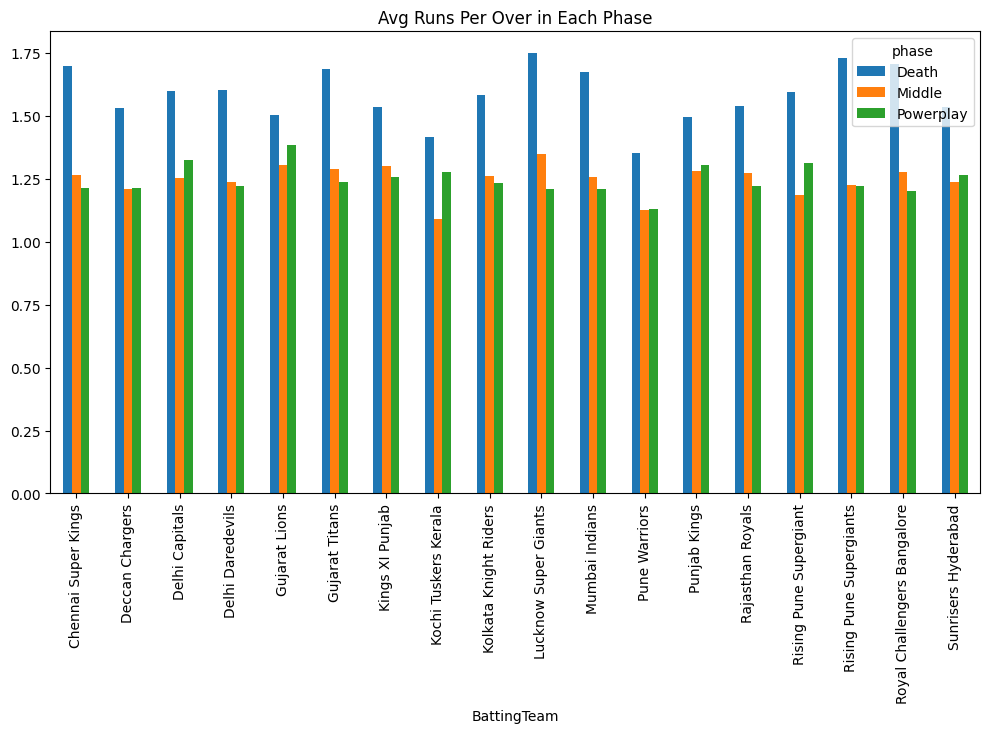

In [37]:
phase_performance = df.groupby(['BattingTeam', 'phase'])['total_run'].mean().unstack()
phase_performance.plot(kind='bar', figsize=(12,6), title='Avg Runs Per Over in Each Phase')


In [39]:
df['BowlingTeam'] = df.groupby('ID')['BattingTeam'].transform(lambda x: x.shift().bfill())


<Axes: title={'center': 'Extras Conceded by Teams'}, xlabel='BowlingTeam'>

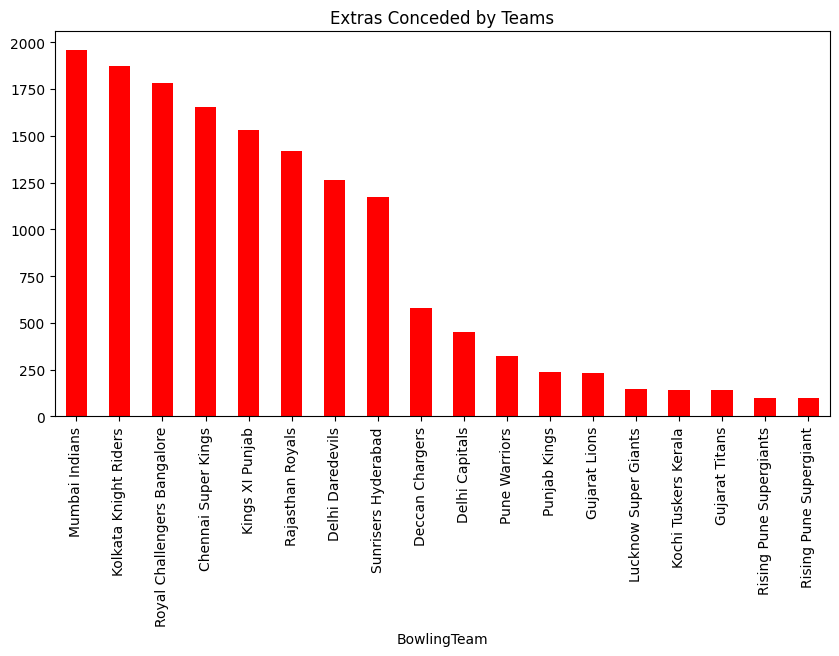

In [40]:
extras_by_team = df.groupby('BowlingTeam')['extras_run'].sum().sort_values(ascending=False)
extras_by_team.plot(kind='bar', figsize=(10,5), title='Extras Conceded by Teams', color='red')


<Axes: title={'center': 'Dismissal Types'}, xlabel='kind'>

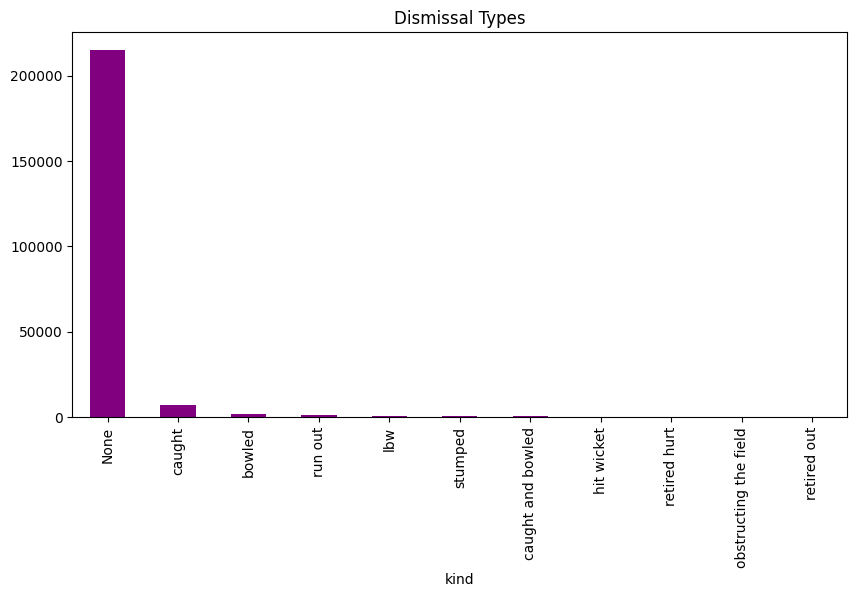

In [42]:
dismissal_types = df['kind'].value_counts()
dismissal_types.plot(kind='bar', figsize=(10,5), title='Dismissal Types', color='purple')


<Axes: title={'center': 'Top 10 Aggressive Batsmen (Strike Rate)'}, xlabel='batter'>

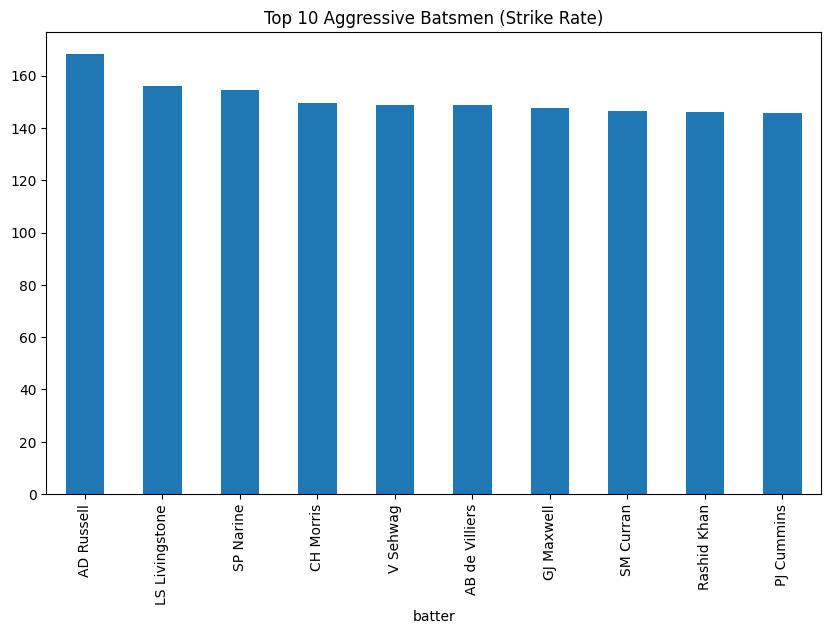

In [43]:
# (runs per 100 balls faced)
batter_stats = df.groupby('batter').agg({'batsman_run': 'sum', 'ballnumber': 'count'})
batter_stats['strike_rate'] = (batter_stats['batsman_run'] / batter_stats['ballnumber']) * 100
top_strikers = batter_stats[batter_stats['ballnumber'] > 200].sort_values('strike_rate', ascending=False).head(10)

top_strikers['strike_rate'].plot(kind='bar', figsize=(10,6), title='Top 10 Aggressive Batsmen (Strike Rate)')


<Axes: title={'center': 'Top 10 Wicket-Taking Bowlers'}, xlabel='bowler'>

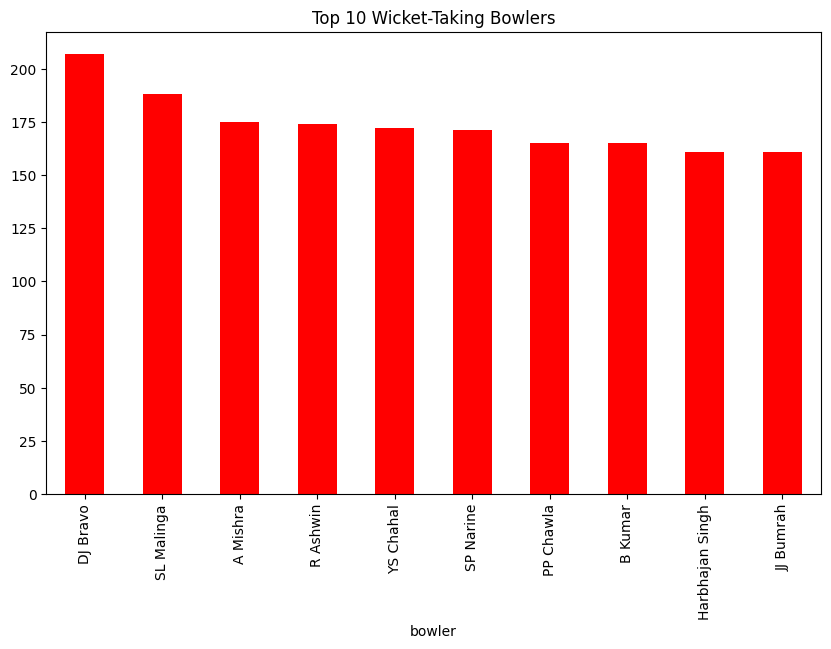

In [44]:
wickets = df[df['isWicketDelivery'] == 1]
top_bowlers = wickets['bowler'].value_counts().head(10)


top_bowlers.plot(kind='bar', color='red', figsize=(10,6), title='Top 10 Wicket-Taking Bowlers')

<Axes: title={'center': 'Runs Scored per Over'}, xlabel='overs'>

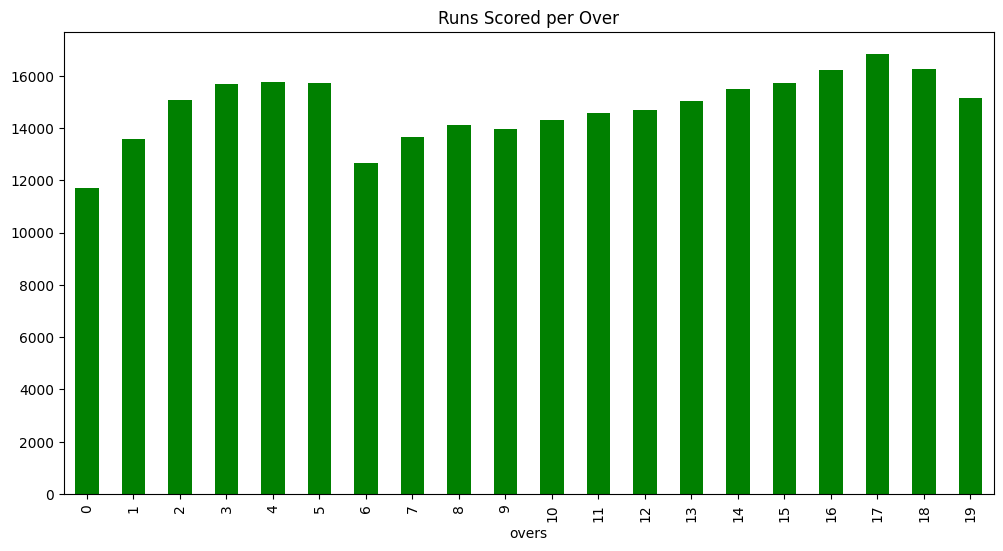

In [45]:
over_runs = df.groupby('overs')['total_run'].sum()

over_runs.plot(kind='bar', figsize=(12,6), color='green', title='Runs Scored per Over')


<Axes: title={'center': 'Top 10 Batsmen by Boundary %'}, xlabel='batter'>

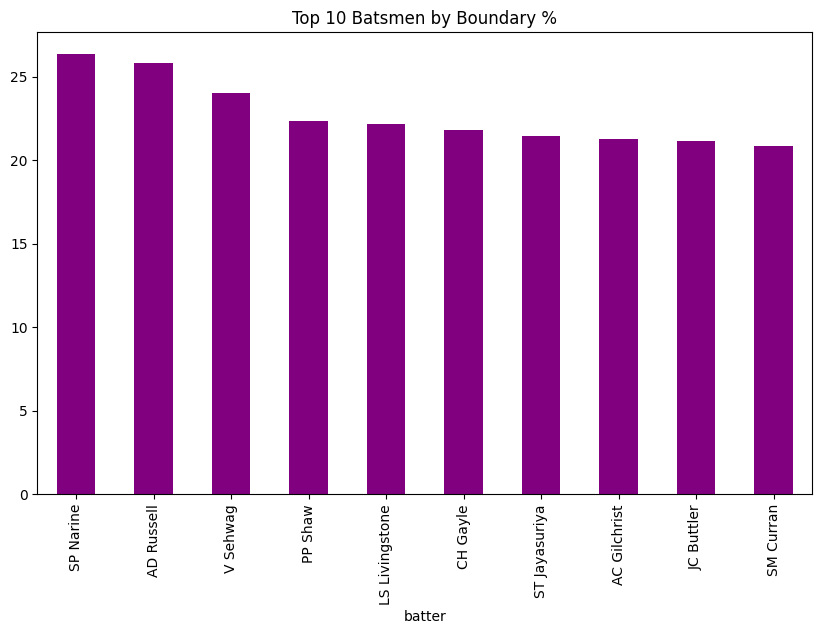

In [46]:
df['is_boundary'] = df['batsman_run'].apply(lambda x: 1 if x in [4,6] else 0)
boundary_stats = df.groupby('batter').agg({'is_boundary': 'sum', 'ballnumber': 'count'})
boundary_stats['boundary_percent'] = (boundary_stats['is_boundary'] / boundary_stats['ballnumber']) * 100
top_boundary_hitters = boundary_stats[boundary_stats['ballnumber'] > 200].sort_values('boundary_percent', ascending=False).head(10)

top_boundary_hitters['boundary_percent'].plot(kind='bar', figsize=(10,6), color='purple', title='Top 10 Batsmen by Boundary %')


<Axes: title={'center': 'Extras Conceded by Teams'}, ylabel='BattingTeam'>

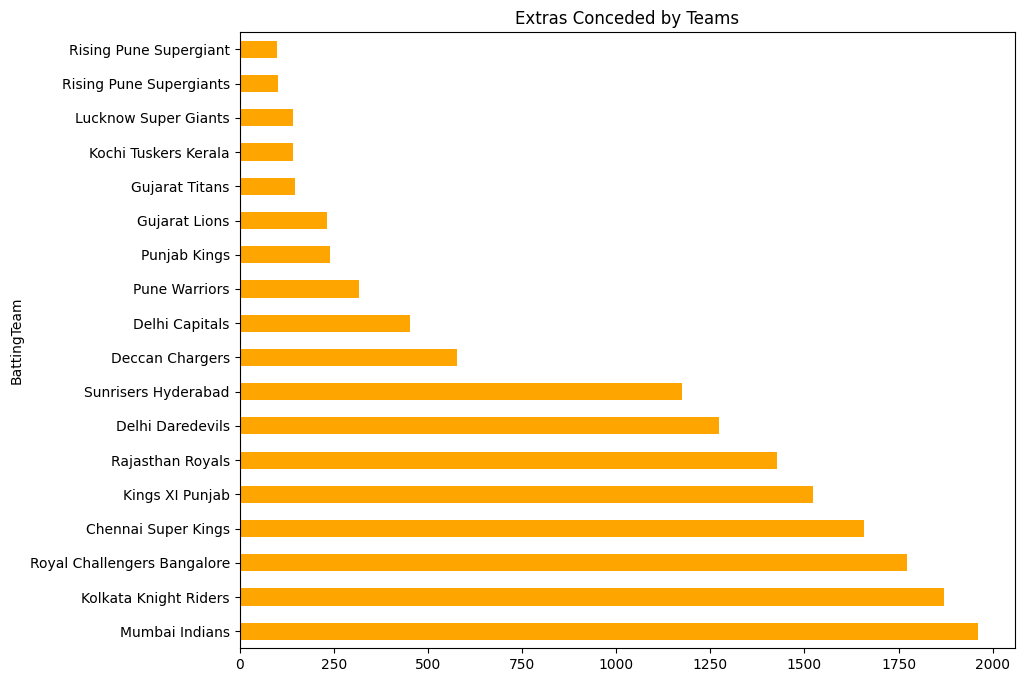

In [47]:
extra_by_team = df.groupby('BattingTeam')['extras_run'].sum().sort_values(ascending=False)


extra_by_team.plot(kind='barh', figsize=(10,8), color='orange', title='Extras Conceded by Teams')


<Axes: title={'center': 'Most Common Modes of Dismissal'}, xlabel='kind'>

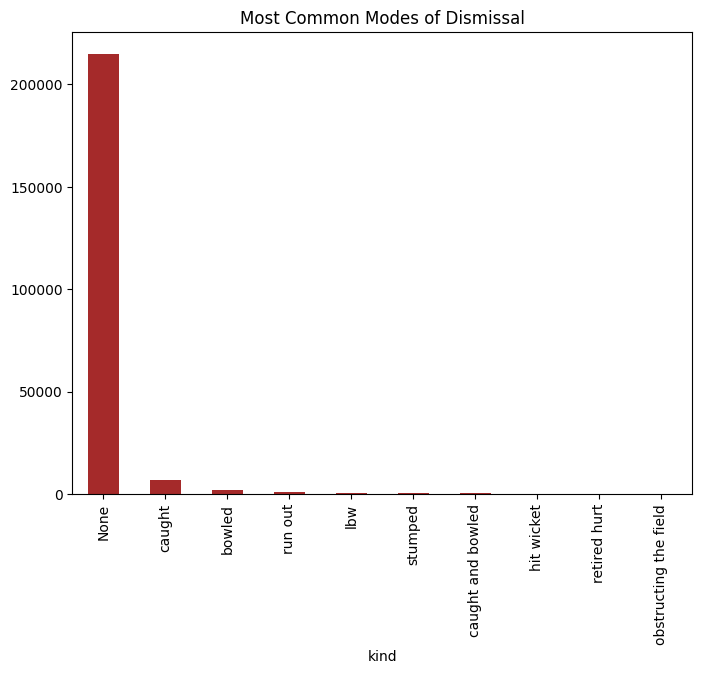

In [48]:
dismissal_types = df['kind'].value_counts().head(10)

dismissal_types.plot(kind='bar', color='brown', figsize=(8,6), title='Most Common Modes of Dismissal')


In [49]:
top_batsmen = df.groupby('batter').agg({'batsman_run': 'sum', 'ID': 'count'}).reset_index()
top_batsmen['strike_rate'] = (top_batsmen['batsman_run'] / top_batsmen['ID']) * 100
top_batsmen = top_batsmen[top_batsmen['ID'] > 200]  # filter low matches
top_batsmen.sort_values(by='strike_rate', ascending=False).head(10)


,batter,batsman_run,ID,strike_rate
36,AD Russell,2039,1212,168.234323
292,LS Livingstone,549,352,155.965909
508,SP Narine,1025,664,154.367470
109,CH Morris,618,413,149.636804
571,V Sehwag,2728,1833,148.827059
27,AB de Villiers,5181,3487,148.580442
183,GJ Maxwell,2320,1571,147.676639
497,SM Curran,337,230,146.521739
454,Rashid Khan,313,214,146.261682
389,PJ Cummins,379,260,145.769231


<Axes: title={'center': 'Best Death Over Bowlers (Least Runs Conceded)'}, xlabel='bowler'>

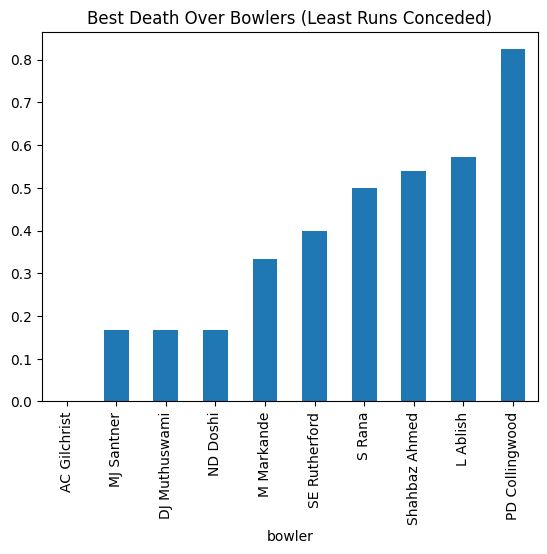

In [50]:
death_overs = df[(df['overs'] >= 16) & (df['overs'] <= 20)]
death_bowlers = death_overs.groupby('bowler')['total_run'].mean().sort_values().head(10)
death_bowlers.plot(kind='bar', title='Best Death Over Bowlers (Least Runs Conceded)')


<Axes: title={'center': 'Average Powerplay Runs by Team'}, ylabel='BattingTeam'>

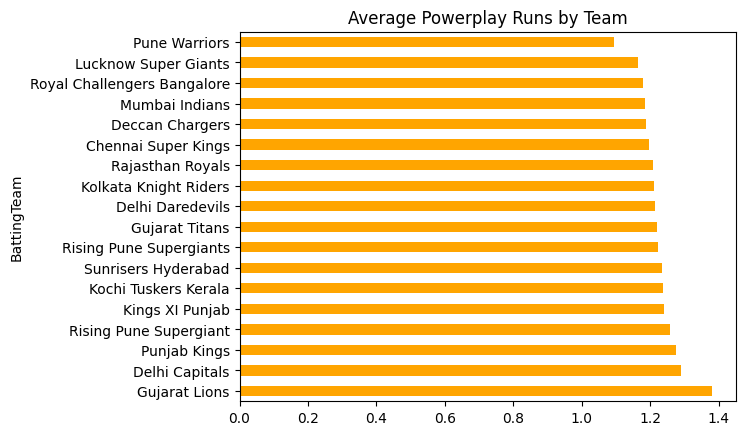

In [51]:
powerplay = df[df['overs'] <= 6]
team_powerplay = powerplay.groupby('BattingTeam')['total_run'].mean().sort_values(ascending=False)
team_powerplay.plot(kind='barh', title='Average Powerplay Runs by Team', color='orange')


<Axes: title={'center': 'Extras Given by Team'}, xlabel='BattingTeam'>

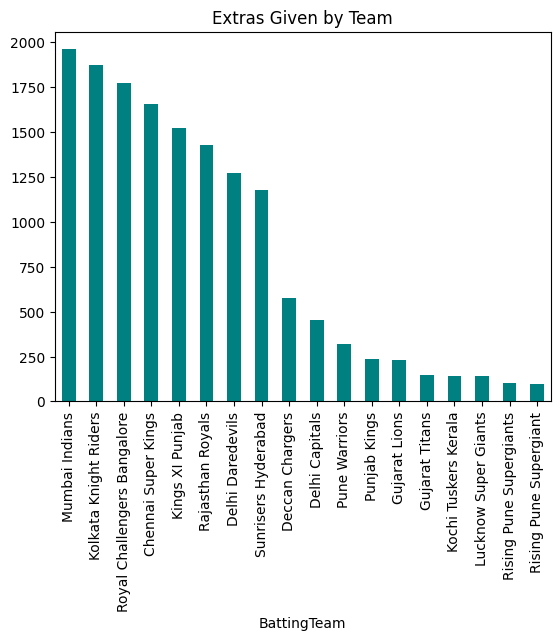

In [53]:
extras_by_team = df.groupby('BattingTeam')['extras_run'].sum().sort_values(ascending=False)
extras_by_team.plot(kind='bar', title='Extras Given by Team', color='teal')


<Axes: title={'center': 'Top Dot Ball Bowlers'}, xlabel='bowler'>

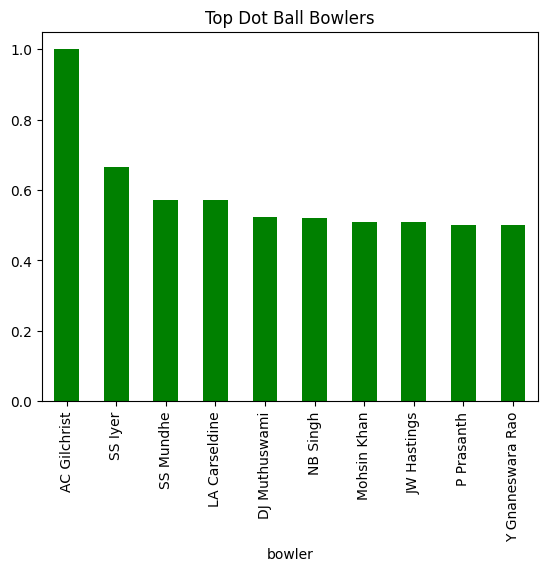

In [54]:
dot_balls = df[df['total_run'] == 0]
dot_pct = dot_balls.groupby('bowler')['total_run'].count() / df.groupby('bowler')['total_run'].count()
dot_pct = dot_pct.dropna().sort_values(ascending=False).head(10)
dot_pct.plot(kind='bar', title='Top Dot Ball Bowlers', color='green')


<Axes: title={'center': 'Top Boundary Hitters'}, xlabel='batter'>

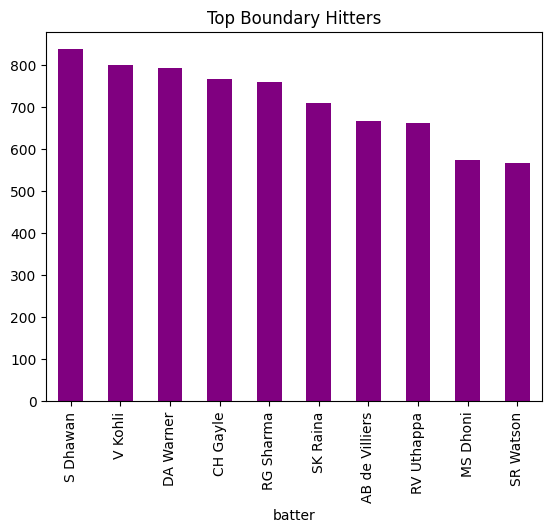

In [55]:
boundaries = df[df['batsman_run'].isin([4, 6])]
boundary_counts = boundaries.groupby('batter')['batsman_run'].count().sort_values(ascending=False).head(10)
boundary_counts.plot(kind='bar', title='Top Boundary Hitters', color='purple')


<Axes: title={'center': 'Best Bowling Economy Rates'}, xlabel='bowler'>

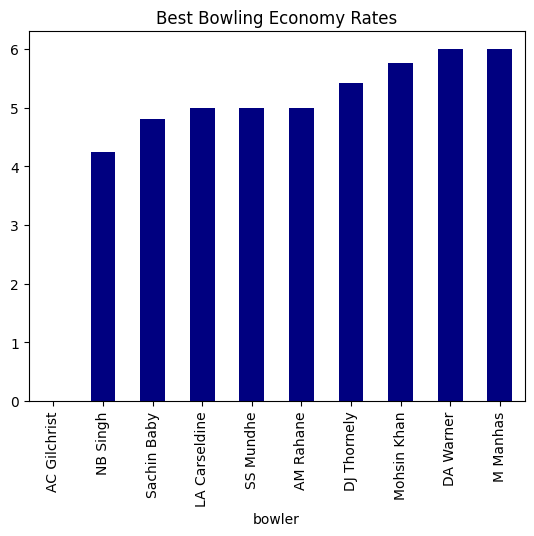

In [56]:
balls = df[df['extra_type'] != 'wides']
bowler_runs = balls.groupby('bowler')['total_run'].sum()
bowler_overs = balls.groupby('bowler')['ballnumber'].count() / 6
economy = (bowler_runs / bowler_overs).sort_values().head(10)
economy.plot(kind='bar', title='Best Bowling Economy Rates', color='navy')


<Axes: title={'center': 'Most Valuable Players (Runs + Wickets)'}>

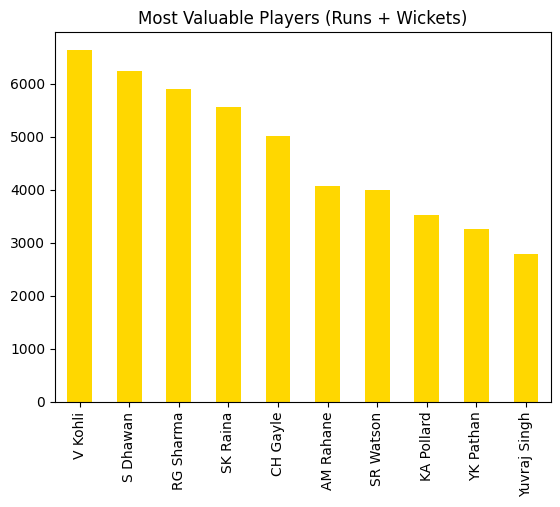

In [57]:
runs = df.groupby('batter')['batsman_run'].sum()
wickets = df[df['isWicketDelivery'] == 1].groupby('bowler')['isWicketDelivery'].count()
combined = (runs + wickets).sort_values(ascending=False).head(10)
combined.plot(kind='bar', title='Most Valuable Players (Runs + Wickets)', color='gold')


<Axes: title={'center': 'Top Partnerships by Total Runs'}, ylabel='pair'>

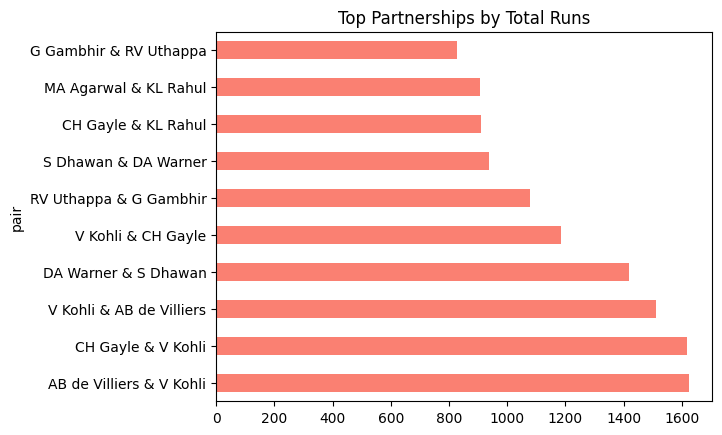

In [58]:
df['pair'] = df['batter'] + ' & ' + df['non-striker']
partnerships = df.groupby('pair')['total_run'].sum().sort_values(ascending=False).head(10)
partnerships.plot(kind='barh', title='Top Partnerships by Total Runs', color='salmon')


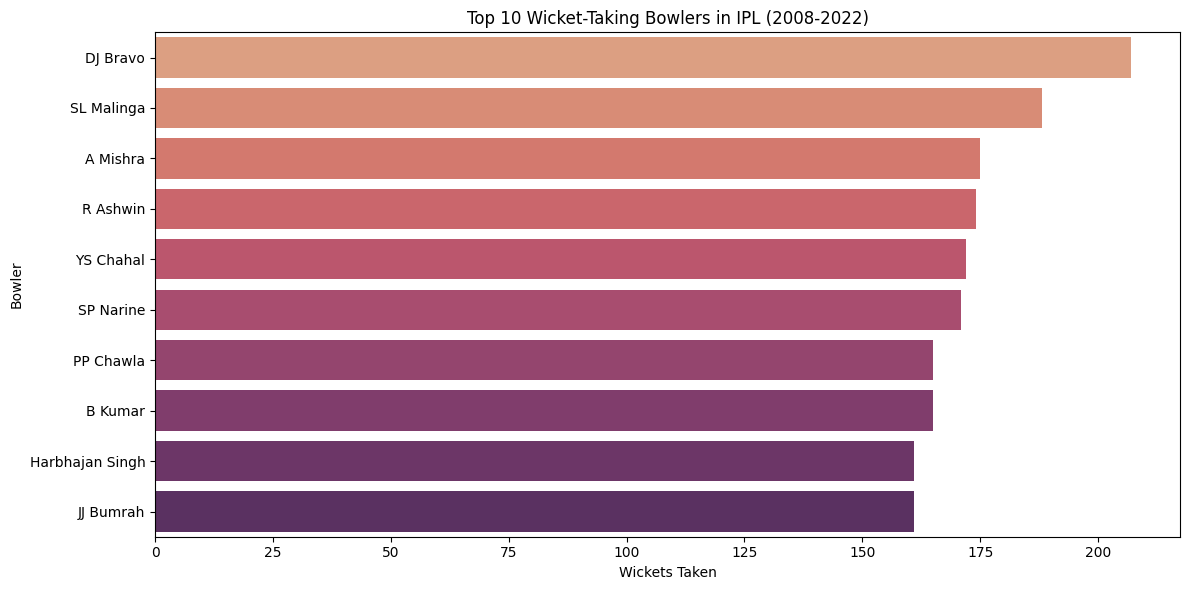

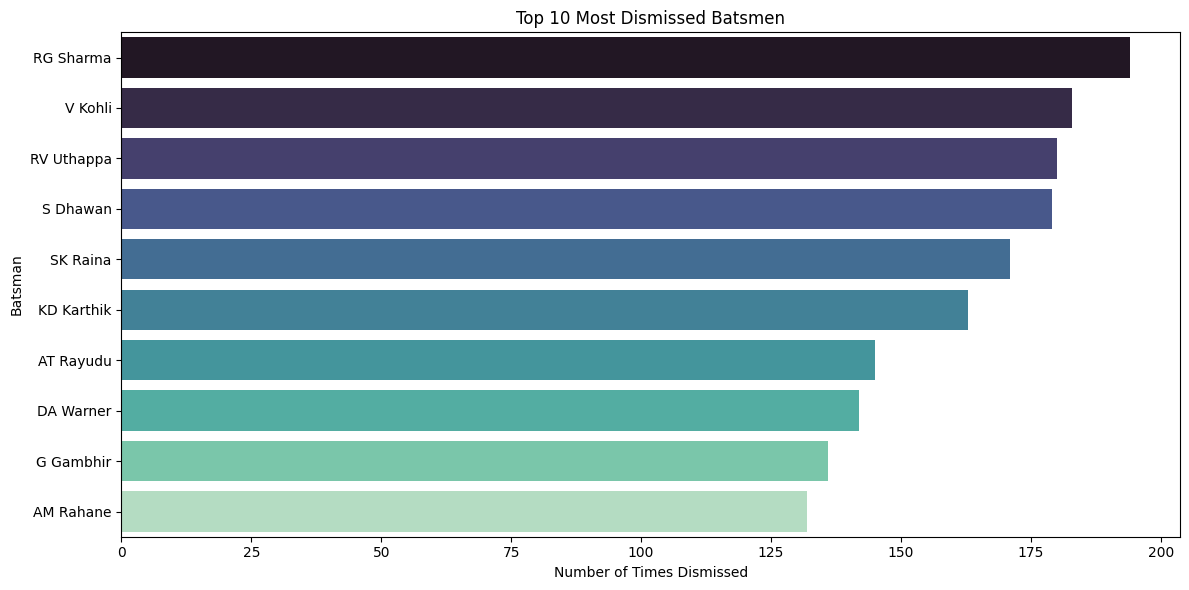

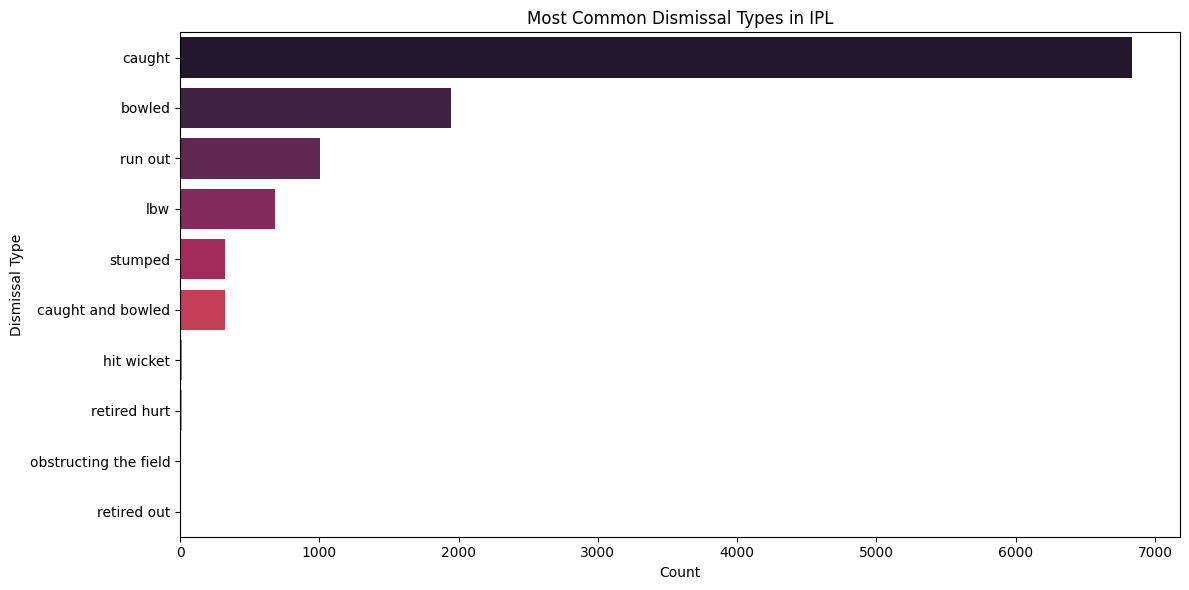

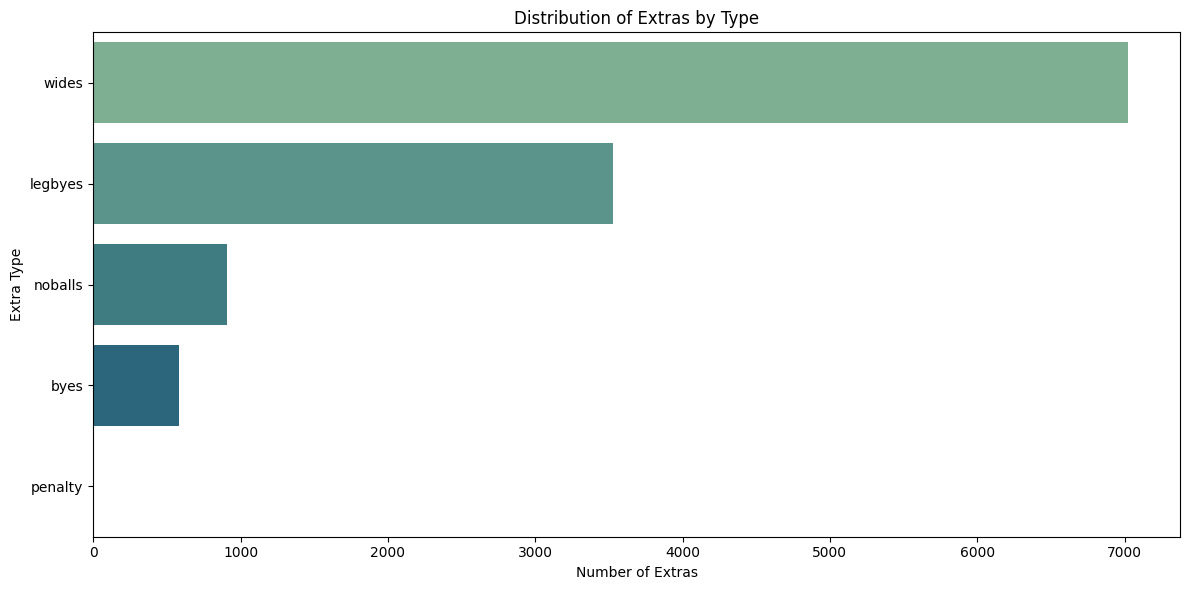

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


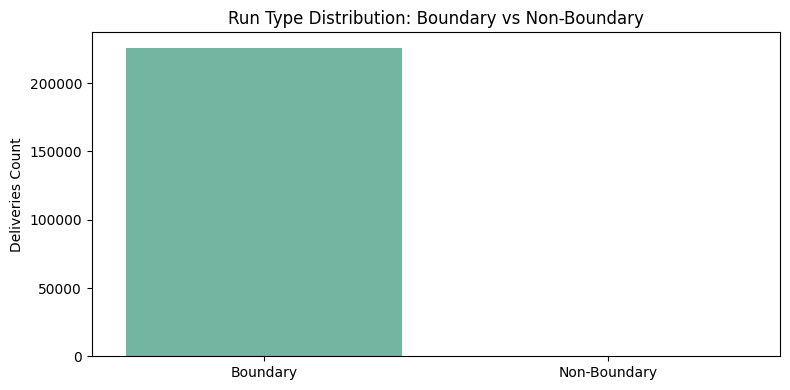

In [59]:

top_wicket_bowlers = df[df['isWicketDelivery'] == 1]['bowler'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_wicket_bowlers.values, y=top_wicket_bowlers.index, palette="flare")
plt.title("Top 10 Wicket-Taking Bowlers in IPL (2008-2022)")
plt.xlabel("Wickets Taken")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()

top_dismissed = df[df['player_out'] != 'None']['player_out'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_dismissed.values, y=top_dismissed.index, palette="mako")
plt.title("Top 10 Most Dismissed Batsmen")
plt.xlabel("Number of Times Dismissed")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()

dismissal_modes = df[df['kind'] != 'None']['kind'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=dismissal_modes.values, y=dismissal_modes.index, palette="rocket")
plt.title("Most Common Dismissal Types in IPL")
plt.xlabel("Count")
plt.ylabel("Dismissal Type")
plt.tight_layout()
plt.show()

extras_type = df[df['extra_type'] != 'None']['extra_type'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=extras_type.values, y=extras_type.index, palette="crest")
plt.title("Distribution of Extras by Type")
plt.xlabel("Number of Extras")
plt.ylabel("Extra Type")
plt.tight_layout()
plt.show()

non_boundary_stats = df['non_boundary'].value_counts().sort_index()
labels = ["Boundary", "Non-Boundary"]
plt.figure(figsize=(8, 4))
sns.barplot(x=labels, y=non_boundary_stats.values, palette="Set2")
plt.title("Run Type Distribution: Boundary vs Non-Boundary")
plt.ylabel("Deliveries Count")
plt.tight_layout()
plt.show()